In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster.bicluster import SpectralCoclustering

In [17]:
whisky = pd.read_csv('whiskies.txt')
whisky['Region'] = pd.read_csv('regions.txt')
flavors = whisky.iloc[:, 2:14]
corr_flavors = pd.DataFrame.corr(flavors)
corr_whisky = pd.DataFrame.corr(flavors.transpose())

In [18]:
model = SpectralCoclustering(n_clusters = 6, random_state = 0)
model.fit(corr_whisky)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
                     n_init=10, n_jobs=None, n_svd_vecs=None, random_state=0,
                     svd_method='randomized')

In [19]:
#extract the group labels form the model and append them to whiskey table
#specify their index explicity
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)

In [20]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands,5
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside,2
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands,3
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay,4
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands,3
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands,2
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside,0
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside,2


In [21]:
#reorder the rows in increasing order by group labels
#these are the group labes that have been discovered using 
#spectral co-clustering
whisky = whisky.ix[np.argsort(model.row_labels_)]

In [22]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
33,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
32,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
40,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
45,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,Glengoyne,1,2,0,0,0,1,1,1,2,2,3,2,G63 9LB,252810,682750,Highlands,5
31,32,Edradour,2,3,1,0,0,2,1,1,4,2,2,2,PH16 5JP,295960,757940,Highlands,5
35,36,GlenGrant,1,2,0,0,0,1,0,1,2,1,2,1,AB38 7BS,327610,849570,Speyside,5
71,72,Scapa,2,2,1,1,0,2,1,1,2,2,2,2,KW15 1SE,342850,1008930,Islands,5


In [23]:
#reset the index of DataFrame
whisky = whisky.reset_index(drop = True)

In [24]:
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,47,Glengoyne,1,2,0,0,0,1,1,1,2,2,3,2,G63 9LB,252810,682750,Highlands,5
82,32,Edradour,2,3,1,0,0,2,1,1,4,2,2,2,PH16 5JP,295960,757940,Highlands,5
83,36,GlenGrant,1,2,0,0,0,1,0,1,2,1,2,1,AB38 7BS,327610,849570,Speyside,5
84,72,Scapa,2,2,1,1,0,2,1,1,2,2,2,2,KW15 1SE,342850,1008930,Islands,5


In [25]:
#recalculate the colleration matrix
#turn the colleration matrix into numPy array
whisky.iloc[:, 2:14].transpose()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Body,2,2,2,1,1,1,2,1,2,2,...,2,3,2,2,2,1,2,1,2,2
Sweetness,3,3,3,3,3,2,3,3,2,1,...,1,2,2,3,2,2,3,2,2,2
Smoky,0,1,1,1,1,1,1,1,3,3,...,1,2,2,1,2,0,1,0,1,2
Medicinal,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
Tobacco,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honey,0,2,1,0,0,1,2,2,2,0,...,1,3,2,2,1,1,2,1,2,2
Spicy,2,1,1,1,0,2,2,2,2,3,...,1,1,2,2,2,1,1,0,1,1
Winey,1,1,2,1,0,0,2,0,1,1,...,1,1,1,1,2,1,1,1,1,2
Nutty,1,1,0,1,0,0,1,1,1,0,...,2,2,2,2,2,2,4,2,2,2
Malty,2,1,2,2,2,2,2,2,1,2,...,1,3,2,1,2,2,2,1,2,2


In [26]:
pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1.000000,0.449042,4.621682e-01,0.592638,0.630087,0.601457,0.573819,0.424397,-0.059028,0.326236,...,0.328031,0.245416,0.385987,0.572637,0.504753,0.609756,4.077954e-01,0.504753,0.349215,0.267222
1,0.449042,1.000000,2.897749e-01,0.574257,0.708794,0.667267,0.895813,0.651120,0.514776,0.263432,...,0.656904,0.626938,0.700081,0.857537,0.584999,0.638112,6.058929e-01,0.623360,0.744445,0.700081
2,0.462168,0.289775,1.000000e+00,0.660578,0.411706,0.204037,0.426401,0.354787,0.197386,0.090909,...,-0.219382,0.174078,0.033095,0.174078,0.165476,-0.081559,-3.532528e-17,0.033095,0.077850,0.165476
3,0.592638,0.574257,6.605783e-01,1.000000,0.703906,0.529503,0.677772,0.644503,0.358569,0.330289,...,0.265684,0.361403,0.480963,0.527046,0.601204,0.395092,4.954337e-01,0.360722,0.424264,0.480963
4,0.630087,0.708794,4.117056e-01,0.703906,1.000000,0.753206,0.653156,0.598592,0.262915,0.387488,...,0.370138,0.457114,0.484906,0.510113,0.484906,0.630087,4.117056e-01,0.520172,0.559954,0.484906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.609756,0.638112,-8.155909e-02,0.395092,0.630087,0.601457,0.669456,0.424397,-0.059028,0.163118,...,0.721667,0.513142,0.623518,0.676753,0.623518,1.000000,7.340318e-01,0.861049,0.768273,0.623518
82,0.407795,0.605893,-3.532528e-17,0.495434,0.411706,0.291482,0.533002,0.473050,0.197386,-0.045455,...,0.731272,0.671442,0.728094,0.783349,0.628808,0.734032,1.000000e+00,0.860474,0.817424,0.728094
83,0.504753,0.623360,3.309517e-02,0.360722,0.520172,0.265283,0.543305,0.301372,-0.071858,-0.165476,...,0.665544,0.516033,0.518072,0.697097,0.518072,0.861049,8.604744e-01,1.000000,0.765207,0.662651
84,0.349215,0.744445,7.784989e-02,0.424264,0.559954,0.524182,0.684653,0.607644,0.338062,0.116775,...,0.751469,0.830540,0.765207,0.745356,0.595161,0.768273,8.174239e-01,0.765207,1.000000,0.765207


In [27]:
collerations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())
#Turn collerations into a numpy array
collerations = np.array(collerations)
collerations

array([[1.        , 0.44904168, 0.46216816, ..., 0.50475261, 0.34921515,
        0.26722197],
       [0.44904168, 1.        , 0.28977485, ..., 0.62335961, 0.74444508,
        0.7000808 ],
       [0.46216816, 0.28977485, 1.        , ..., 0.03309517, 0.07784989,
        0.16547585],
       ...,
       [0.50475261, 0.62335961, 0.03309517, ..., 1.        , 0.76520727,
        0.6626506 ],
       [0.34921515, 0.74444508, 0.07784989, ..., 0.76520727, 1.        ,
        0.76520727],
       [0.26722197, 0.7000808 , 0.16547585, ..., 0.6626506 , 0.76520727,
        1.        ]])

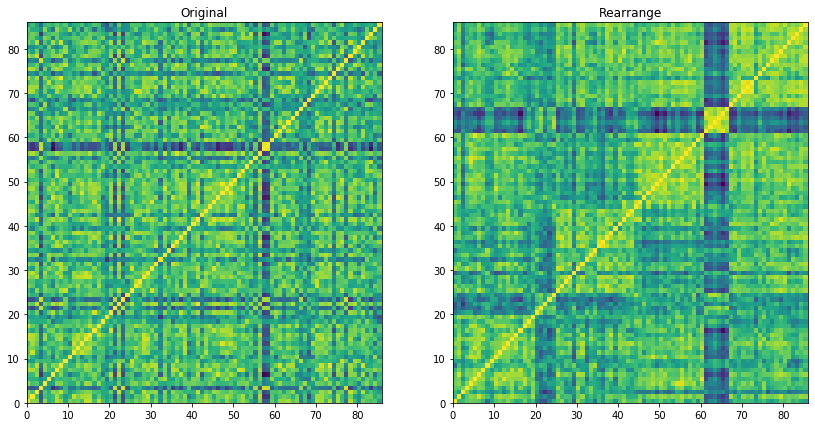

In [28]:
#Plot the original correlation coefficients
#and the rearranged correlation coeficients
#expect to form clusters

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title('Original')
plt.axis('tight')
plt.subplot(122)
plt.pcolor(collerations)
plt.title('Rearrange')
plt.axis('tight')
plt.show()